In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [3]:
df = pd.read_csv('data/bitcoin_price_data.csv')
df.head(10)

,date,close
0,11/13/2017,8036.490234
1,11/20/2017,9330.549805
2,11/27/2017,11323.200200
3,12/4/2017,15455.400390
4,12/11/2017,19140.800780
5,12/18/2017,13925.799800
6,12/25/2017,14156.400390
7,1/1/2018,16477.599610
8,1/8/2018,13772.000000
9,1/15/2018,11600.099610


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    364 non-null    object 
 1   close   364 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
df.describe()

,close
count,364.000000
mean,26357.754875
std,19918.469530
min,3252.839026
25%,8799.436971
50%,20819.896965
75%,41277.034068
max,71333.647930


In [6]:
px.area(df, x='date', y='close')

In [7]:
px.violin(df, y='close')

In [8]:
df.columns

Index(['date', 'close'], dtype='object')

In [9]:
prophet_df = df.rename(columns={'date':'ds', 'close':'y'})

In [10]:
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [11]:
model = Prophet()

In [12]:
model.fit(prophet_df)

16:41:33 - cmdstanpy - INFO - Chain [1] start processing
16:41:33 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=30)

In [14]:
forecast = model.predict(future)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-13,1405.864933,-15424.465547,15363.477350,1405.864933,1405.864933,-1005.504903,-1005.504903,-1005.504903,-1005.504903,-1005.504903,-1005.504903,0.0,0.0,0.0,400.360030
1,2017-11-20,1543.207949,-14677.942568,15443.289421,1543.207949,1543.207949,-1104.798463,-1104.798463,-1104.798463,-1104.798463,-1104.798463,-1104.798463,0.0,0.0,0.0,438.409486
2,2017-11-27,1680.550964,-16297.073075,15493.892839,1680.550964,1680.550964,-949.799459,-949.799459,-949.799459,-949.799459,-949.799459,-949.799459,0.0,0.0,0.0,730.751505
3,2017-12-04,1817.893979,-14265.149537,17143.778145,1817.893979,1817.893979,-848.637026,-848.637026,-848.637026,-848.637026,-848.637026,-848.637026,0.0,0.0,0.0,969.256954
4,2017-12-11,1955.236995,-13363.323825,16008.268223,1955.236995,1955.236995,-758.373872,-758.373872,-758.373872,-758.373872,-758.373872,-758.373872,0.0,0.0,0.0,1196.863123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,2024-11-23,59723.838402,43905.366489,73878.591186,59723.494015,59726.544615,-1041.389839,-1041.389839,-1041.389839,-1041.389839,-1041.389839,-1041.389839,0.0,0.0,0.0,58682.448563
390,2024-11-24,59762.381035,42788.728737,73340.283361,59761.481433,59766.121853,-1016.787437,-1016.787437,-1016.787437,-1016.787437,-1016.787437,-1016.787437,0.0,0.0,0.0,58745.593598
391,2024-11-25,59800.923668,43833.061404,74499.409583,59799.697544,59805.091952,-991.767728,-991.767728,-991.767728,-991.767728,-991.767728,-991.767728,0.0,0.0,0.0,58809.155940
392,2024-11-26,59839.466301,43461.657499,73290.856543,59837.892701,59843.890696,-967.297278,-967.297278,-967.297278,-967.297278,-967.297278,-967.297278,0.0,0.0,0.0,58872.169022


In [20]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          394 non-null    datetime64[ns]
 1   trend                       394 non-null    float64       
 2   yhat_lower                  394 non-null    float64       
 3   yhat_upper                  394 non-null    float64       
 4   trend_lower                 394 non-null    float64       
 5   trend_upper                 394 non-null    float64       
 6   additive_terms              394 non-null    float64       
 7   additive_terms_lower        394 non-null    float64       
 8   additive_terms_upper        394 non-null    float64       
 9   yearly                      394 non-null    float64       
 10  yearly_lower                394 non-null    float64       
 11  yearly_upper                394 non-null    float64       

In [21]:
forecast.describe()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,394,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0,394.0,394.0,394.000000
mean,2021-08-12 10:03:02.741116672,28857.094868,13419.966524,44259.097052,28857.079723,28857.162410,-53.639965,-53.639965,-53.639965,-53.639965,-53.639965,-53.639965,0.0,0.0,0.0,28803.454903
min,2017-11-13 00:00:00,1405.864933,-16297.073075,15363.477350,1405.864933,1405.864933,-3694.991165,-3694.991165,-3694.991165,-3694.991165,-3694.991165,-3694.991165,0.0,0.0,0.0,400.360030
25%,2019-10-01 18:00:00,14899.989413,-359.771411,30688.352301,14899.989413,14899.989413,-1942.873776,-1942.873776,-1942.873776,-1942.873776,-1942.873776,-1942.873776,0.0,0.0,0.0,15335.103206
50%,2021-08-19 12:00:00,28051.571040,12918.257634,43951.992774,28051.571040,28051.571040,-735.808052,-735.808052,-735.808052,-735.808052,-735.808052,-735.808052,0.0,0.0,0.0,28433.261204
75%,2023-07-08 06:00:00,40307.987144,24238.061994,55445.960107,40307.987144,40307.987144,903.165973,903.165973,903.165973,903.165973,903.165973,903.165973,0.0,0.0,0.0,39671.684786
max,2024-11-27 00:00:00,59878.008934,44550.970869,76194.176635,59876.235468,59882.790567,6504.448191,6504.448191,6504.448191,6504.448191,6504.448191,6504.448191,0.0,0.0,0.0,58980.433412
std,NaN,16936.974343,16958.246401,16925.426052,16936.946587,16937.097922,2668.490123,2668.490123,2668.490123,2668.490123,2668.490123,2668.490123,0.0,0.0,0.0,16894.778735


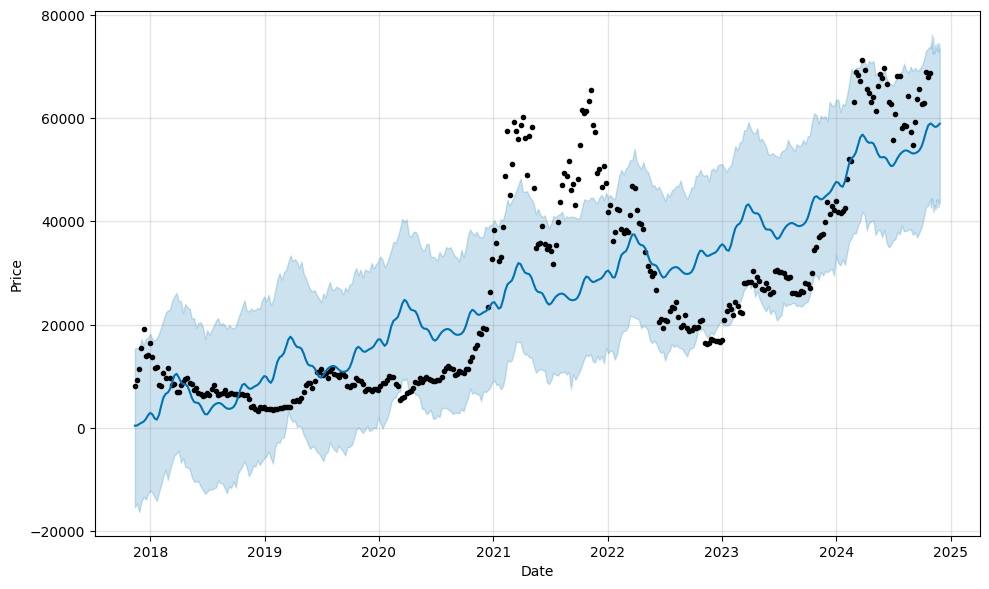

In [22]:
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

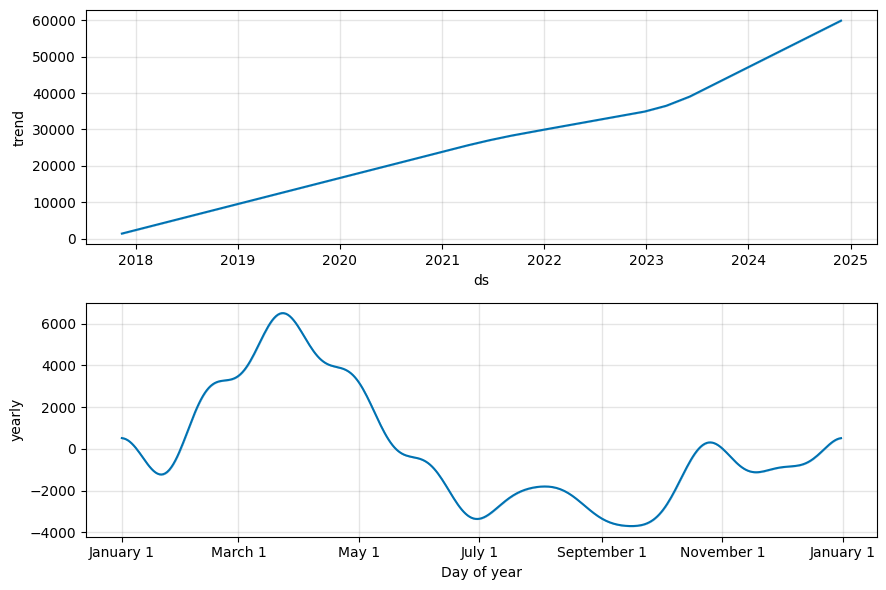

In [23]:
figure_2 = model.plot_components(forecast)